<a href="https://colab.research.google.com/github/bvarshini28/AI-PriceOptima/blob/main/AI_PriceOptima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("dynamic_pricing.csv")
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [ ]:
df.tail()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106


In [ ]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [ ]:
df.shape

(1000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [ ]:
df.columns.tolist()

['Number_of_Riders',
 'Number_of_Drivers',
 'Location_Category',
 'Customer_Loyalty_Status',
 'Number_of_Past_Rides',
 'Average_Ratings',
 'Time_of_Booking',
 'Vehicle_Type',
 'Expected_Ride_Duration',
 'Historical_Cost_of_Ride']

In [ ]:
df.nunique()


,0
Number_of_Riders,81
Number_of_Drivers,79
Location_Category,3
Customer_Loyalty_Status,3
Number_of_Past_Rides,101
Average_Ratings,151
Time_of_Booking,4
Vehicle_Type,2
Expected_Ride_Duration,171
Historical_Cost_of_Ride,1000


In [ ]:
# 2) Missing Values & Duplicates
missing_counts = df.isnull().sum().sort_values(ascending=False)
dupe_count = df.duplicated().sum()

print("\nMissing values by column:\n", missing_counts)
print("\nDuplicate rows:", dupe_count)

# Decision: since there are no missings/dupes in your file, no imputations/drops needed.
# If there were, here are templates you could use later:
# df = df.drop_duplicates()
# df['SomeNumeric'] = df['SomeNumeric'].fillna(df['SomeNumeric']. median())
# df['SomeCategory'] =df['SomeCategory'].fillna('Unknown')



Missing values by column:
 Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

Duplicate rows: 0


In [ ]:
# 3) Data Types & Intended Conversions
# Confirm numeric vs categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]). columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

# If any date columns existed, example:
# df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Ensure categoricals are category dtype (memory + clarity)
for c in cat_cols:
  df[c] = df[c].astype('category')

print("\nDtypes after casting categoricals:")
print(df.dtypes)


Numeric columns: ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
Categorical columns: ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']

Dtypes after casting categoricals:
Number_of_Riders              int64
Number_of_Drivers             int64
Location_Category          category
Customer_Loyalty_Status    category
Number_of_Past_Rides          int64
Average_Ratings             float64
Time_of_Booking            category
Vehicle_Type               category
Expected_Ride_Duration        int64
Historical_Cost_of_Ride     float64
dtype: object


In [ ]:
import numpy as np

# Function to detect outliers using IQR
def find_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers, lower, upper

# Apply to all numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    outliers, lower, upper = find_outliers_iqr(df, col)
    print(f"\nColumn: {col}")
    print(f"Lower Bound: {lower}, Upper Bound: {upper}")
    print(f"Number of Outliers: {len(outliers)}")

    # Show first few outliers
    if not outliers.empty:
        print(outliers[[col]].head())



Column: Number_of_Riders
Lower Bound: -21.5, Upper Bound: 142.5
Number of Outliers: 0

Column: Number_of_Drivers
Lower Bound: -29.5, Upper Bound: 78.5
Number of Outliers: 10
     Number_of_Drivers
42                  81
53                  84
140                 80
294                 80
663                 87

Column: Number_of_Past_Rides
Lower Bound: -50.0, Upper Bound: 150.0
Number of Outliers: 0

Column: Average_Ratings
Lower Bound: 2.72625, Upper Bound: 5.776250000000001
Number of Outliers: 0

Column: Expected_Ride_Duration
Lower Bound: -65.125, Upper Bound: 267.875
Number of Outliers: 0

Column: Historical_Cost_of_Ride
Lower Bound: -212.33325012902748, Upper Bound: 944.1959566799039
Number of Outliers: 0


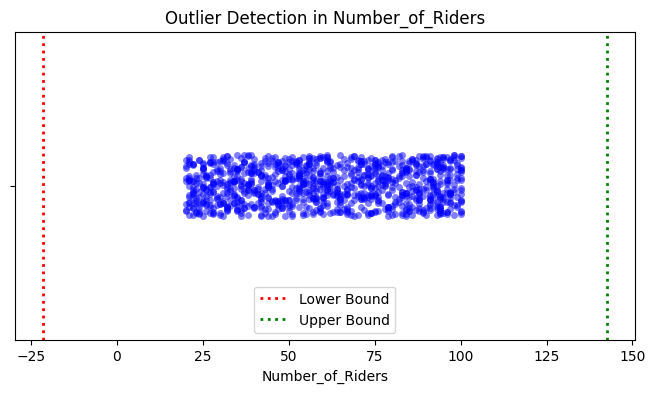

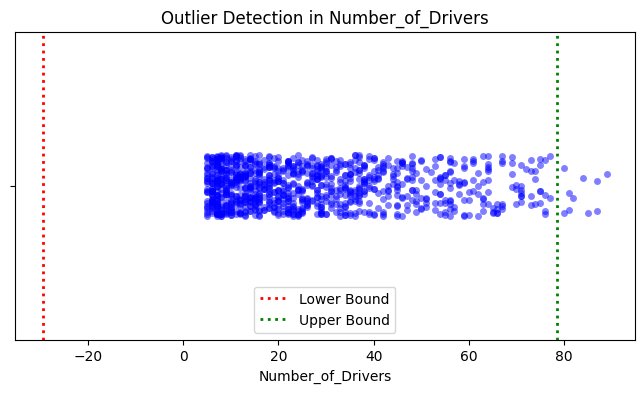

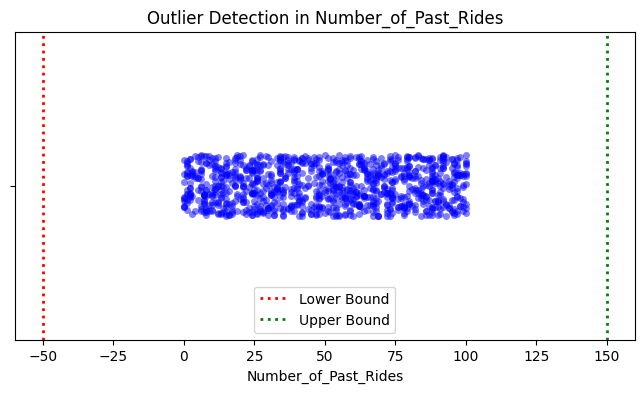

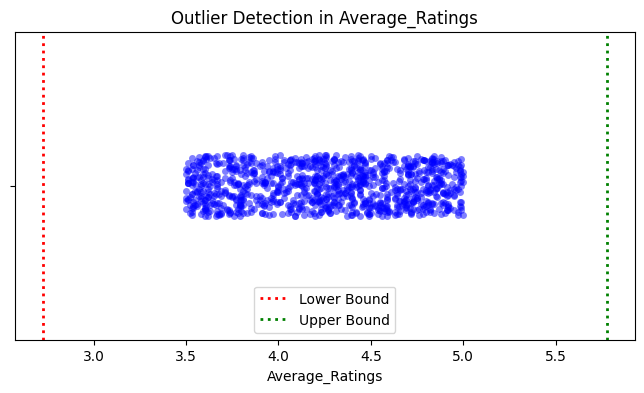

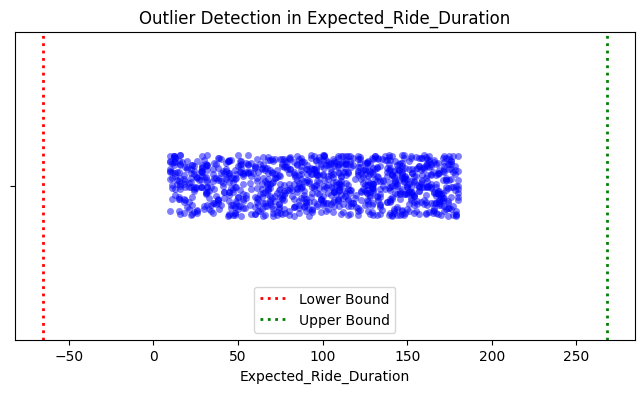

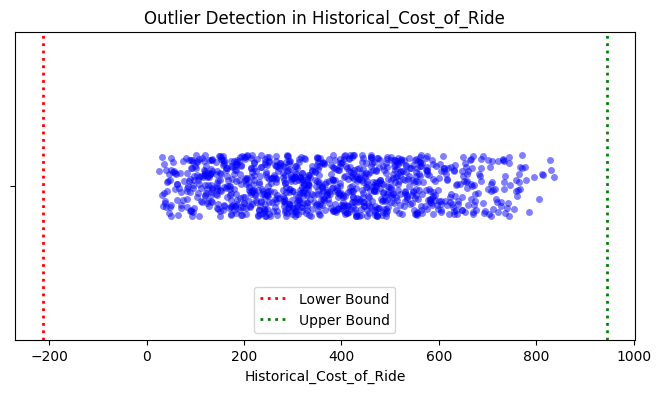

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to plot outliers with dotted lines
def plot_outliers_with_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    plt.figure(figsize=(8,4))
    sns.stripplot(x=data[col], color="blue", alpha=0.5, jitter=True)

    # Add dotted lines for thresholds
    plt.axvline(lower, color="red", linestyle="dotted", linewidth=2, label="Lower Bound")
    plt.axvline(upper, color="green", linestyle="dotted", linewidth=2, label="Upper Bound")

    plt.title(f"Outlier Detection in {col}")
    plt.legend()
    plt.show()

# Apply to all numeric columns
for col in df.select_dtypes(include=np.number).columns:
    plot_outliers_with_iqr(df, col)


In [ ]:
# --- KPIs without modifying df ---

# Completed rides
completed_rides = df[["Number_of_Riders", "Number_of_Drivers"]].min(axis=1)

# Cost assumption
cost_per_ride = 0.7 * df["Historical_Cost_of_Ride"]

# Recommended price (+10%)
recommended_price = df["Historical_Cost_of_Ride"] * 1.10

# --- 1. Revenue (₹) ---
revenue = df["Historical_Cost_of_Ride"] * completed_rides

# --- 2. Profit (₹) ---
profit = (df["Historical_Cost_of_Ride"] - cost_per_ride) * completed_rides

# --- 3. Revenue Lift (%) ---
baseline_revenue = (df["Historical_Cost_of_Ride"] * completed_rides).sum()
recommended_revenue = (recommended_price * completed_rides).sum()
revenue_lift = ((recommended_revenue - baseline_revenue) / baseline_revenue) * 100

# --- 4. Gross Margin (%) ---
gross_margin = ((revenue - (cost_per_ride * completed_rides)) / revenue) * 100

# --- 5. Conversion Rate (%) ---
conversion_rate = (completed_rides / df["Number_of_Riders"]) * 100

# --- 6. Price Change Rate (%) ---
price_changed = df["Historical_Cost_of_Ride"] != recommended_price
price_change_rate = price_changed.sum() / len(df) * 100

# --- 7. Cancellation Rate (%) ---
cancelled_rides = df["Number_of_Riders"] - completed_rides
cancellation_rate = (cancelled_rides / df["Number_of_Riders"]) * 100

# --- Collect KPIs in a dictionary ---
kpi_results = {
    "Revenue (₹)": revenue.sum(),
    "Profit (₹)": profit.sum(),
    "Revenue Lift (%)": revenue_lift,
    "Avg Gross Margin (%)": gross_margin.mean(),
    "Avg Conversion Rate (%)": conversion_rate.mean(),
    "Price Change Rate (%)": price_change_rate,
    "Avg Cancellation Rate (%)": cancellation_rate.mean()
}

# Display KPI results
for k, v in kpi_results.items():
    print(f"{k}: {v:.2f}")


Revenue (₹): 10146781.38
Profit (₹): 3044034.41
Revenue Lift (%): 10.00
Avg Gross Margin (%): 30.00
Avg Conversion Rate (%): 43.82
Price Change Rate (%): 100.00
Avg Cancellation Rate (%): 56.18


In [ ]:
df.shape

(1000, 10)

In [ ]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [ ]:
# -------------------------------
# 🔹 Engineered Columns (added directly into df)
# -------------------------------
# Competitor price (simulate: segment average price as competitor benchmark)
df["competitor_price"] = df.groupby(["Location_Category", "Vehicle_Type"])["Historical_Cost_of_Ride"].transform("mean")

# Competitor Price Index
df["Competitor_Price_Index"] = (df["Historical_Cost_of_Ride"] / df["competitor_price"]) * 100

# Cost per minute
df["Cost_per_Min"] = df["Historical_Cost_of_Ride"] / (df["Expected_Ride_Duration"] + 1e-5)

# Driver-to-Rider Ratio
df["Driver_to_Rider_Ratio"] = df["Number_of_Drivers"] / (df["Number_of_Riders"] + 1e-5)

# Rider-to-Driver Ratio
df["Rider_Driver_Ratio"] = df["Number_of_Riders"] / (df["Number_of_Drivers"] + 1e-5)

# Inventory Health Index
df["Inventory_Health_Index"] = (df["Number_of_Drivers"] / (df["Number_of_Riders"] + 1e-5)) * 100

# Loyalty Score (map loyalty tiers to numeric values)
loyalty_map = {"Regular": 0, "Silver": 1, "Gold": 2, "Platinum": 3}
df["Loyalty_Score"] = df["Customer_Loyalty_Status"].map(loyalty_map)

# Peak flag (1 if Evening or Night, else 0)
df["Peak"] = df["Time_of_Booking"].apply(lambda x: 1 if x in ["Evening", "Night"] else 0)

# Supply Tightness (demand pressure = Riders – Drivers)
df["Supply_Tightness"] = df["Number_of_Riders"] - df["Number_of_Drivers"]

# Vehicle Factor (Economy=1, Premium=2)
vehicle_map = {"Economy": 1, "Premium": 2}
df["Vehicle_Factor"] = df["Vehicle_Type"].map(vehicle_map)

# -------------------------------
# 🔹 Print engineered dataset
# -------------------------------
print(df.head())
print(df.tail())


   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76  

/tmp/ipython-input-2269137211.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["competitor_price"] = df.groupby(["Location_Category", "Vehicle_Type"])["Historical_Cost_of_Ride"].transform("mean")


In [ ]:
df.shape

(1000, 20)

In [ ]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,competitor_price,Competitor_Price_Index,Cost_per_Min,Driver_to_Rider_Ratio,Rider_Driver_Ratio,Inventory_Health_Index,Loyalty_Score,Peak,Supply_Tightness,Vehicle_Factor
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,395.079144,71.949450,3.158414,0.500000,2.000000,49.999994,1,1,45,2
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,369.177242,47.097907,4.043598,0.672414,1.487179,67.241368,1,1,19,1
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,412.963695,79.860645,4.339413,0.738095,1.354838,73.809506,1,0,11,2
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,412.963695,113.860186,3.508964,0.314607,3.178570,31.460671,0,0,61,2
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,341.309149,169.840575,3.890479,0.282051,3.545453,28.205125,0,0,56,1


# New section

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Number_of_Riders         1000 non-null   int64   
 1   Number_of_Drivers        1000 non-null   int64   
 2   Location_Category        1000 non-null   category
 3   Customer_Loyalty_Status  1000 non-null   category
 4   Number_of_Past_Rides     1000 non-null   int64   
 5   Average_Ratings          1000 non-null   float64 
 6   Time_of_Booking          1000 non-null   category
 7   Vehicle_Type             1000 non-null   category
 8   Expected_Ride_Duration   1000 non-null   int64   
 9   Historical_Cost_of_Ride  1000 non-null   float64 
 10  competitor_price         1000 non-null   float64 
 11  Competitor_Price_Index   1000 non-null   float64 
 12  Cost_per_Min             1000 non-null   float64 
 13  Driver_to_Rider_Ratio    1000 non-null   float64 
 14  Rider_Dri

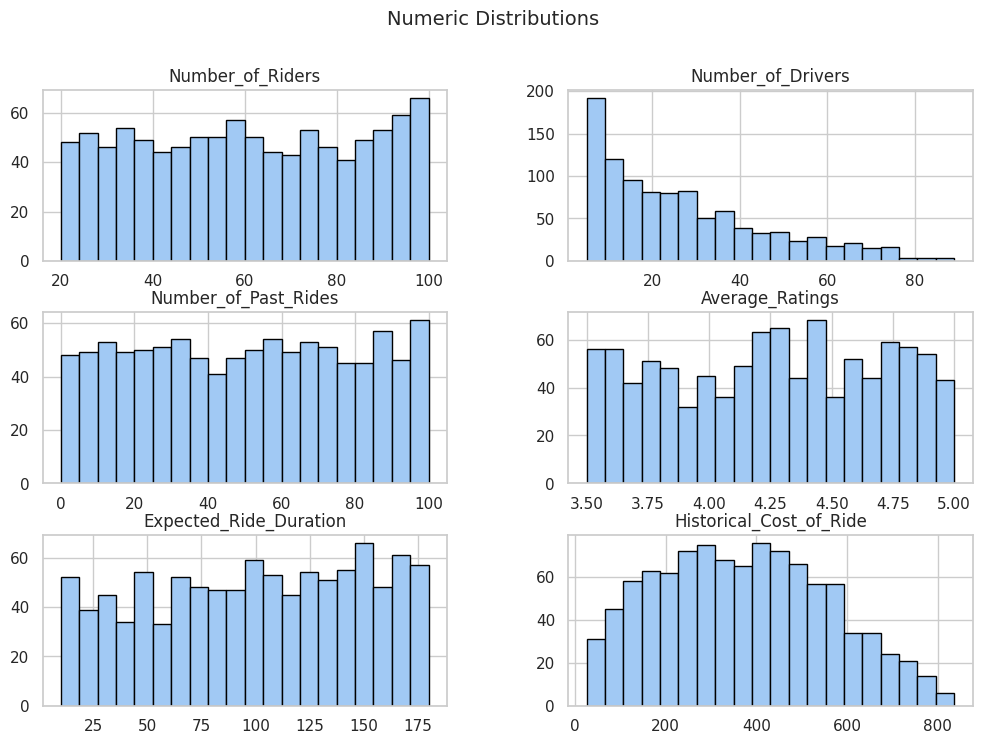

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are styled nicely
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (8,5)

# -------------------------------
# 1) Numeric Distributions
# -------------------------------
num_cols = ['Number_of_Riders', 'Number_of_Drivers',
            'Number_of_Past_Rides', 'Average_Ratings',
            'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

df[num_cols].hist(bins=20, figsize=(12,8), edgecolor="black")
plt.suptitle("Numeric Distributions", fontsize=14)
plt.show()


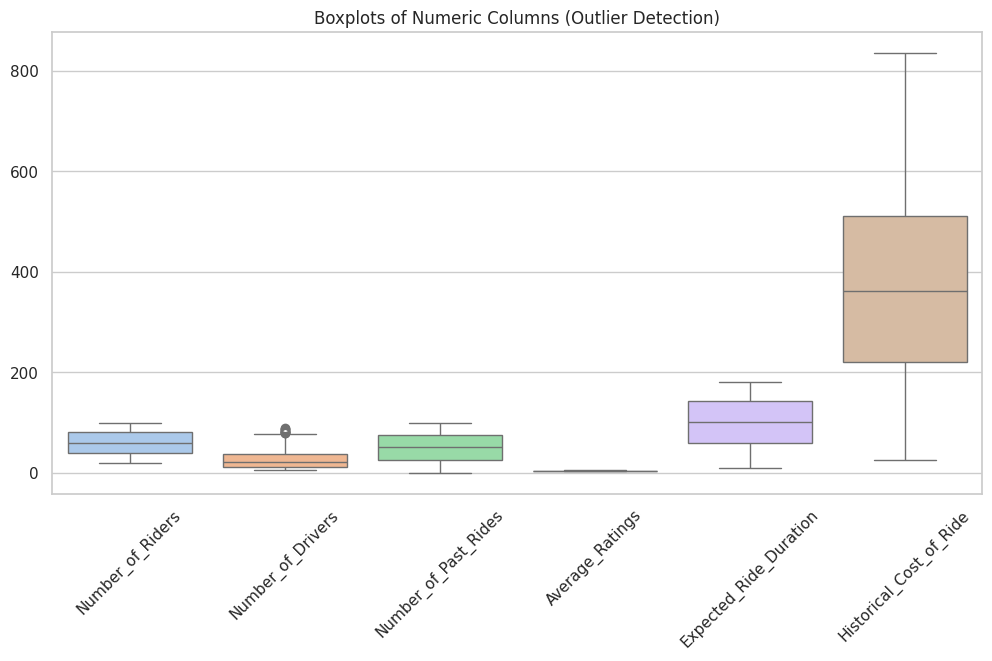

In [ ]:
# 2) Boxplots for Outliers
# -------------------------------
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplots of Numeric Columns (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()

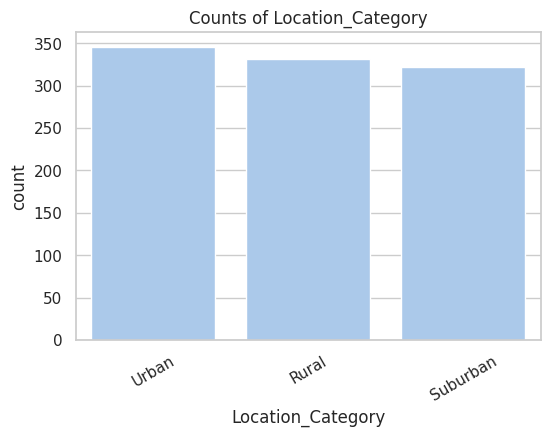

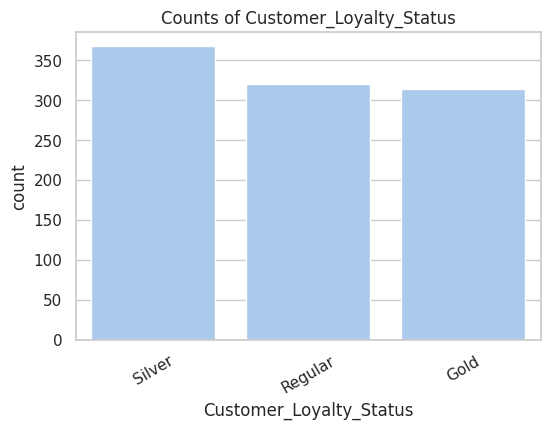

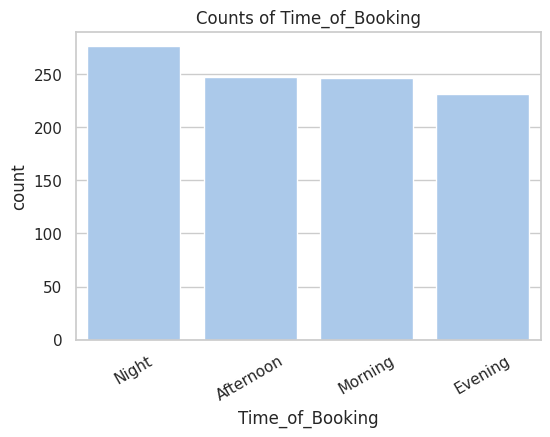

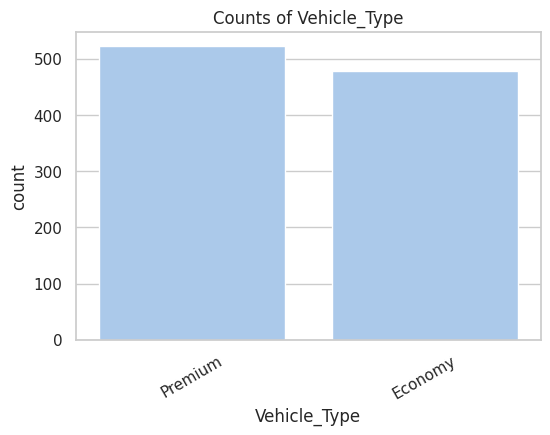

In [ ]:
# 3) Categorical Counts
# -------------------------------
cat_cols = ['Location_Category', 'Customer_Loyalty_Status',
            'Time_of_Booking', 'Vehicle_Type']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Counts of {col}")
    plt.xticks(rotation=30)
    plt.show()

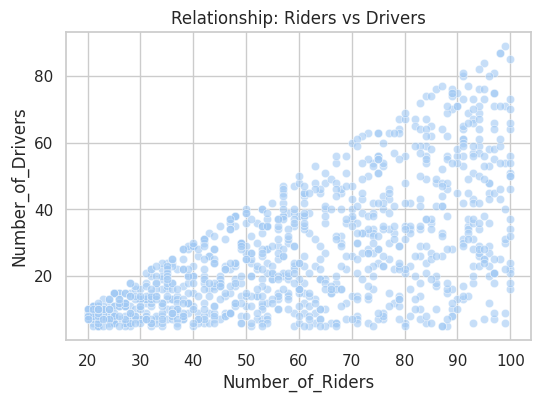

In [ ]:
# 4) Relationships
# Example: Riders vs Drivers
# -------------------------------
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Number_of_Riders", y="Number_of_Drivers", alpha=0.6)
plt.title("Relationship: Riders vs Drivers")
plt.show()

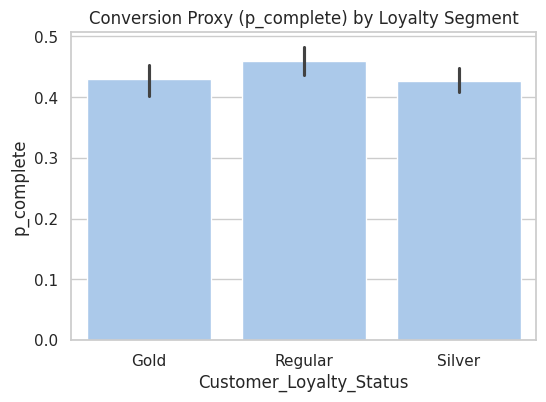

In [ ]:
# 5) Conversion by Segments
# Using proxy: p_complete = Drivers / Riders
# -------------------------------
df["p_complete"] = (df["Number_of_Drivers"] / (df["Number_of_Riders"]+1e-5)).clip(0,1)

plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Customer_Loyalty_Status", y="p_complete", estimator="mean")
plt.title("Conversion Proxy (p_complete) by Loyalty Segment")
plt.show()

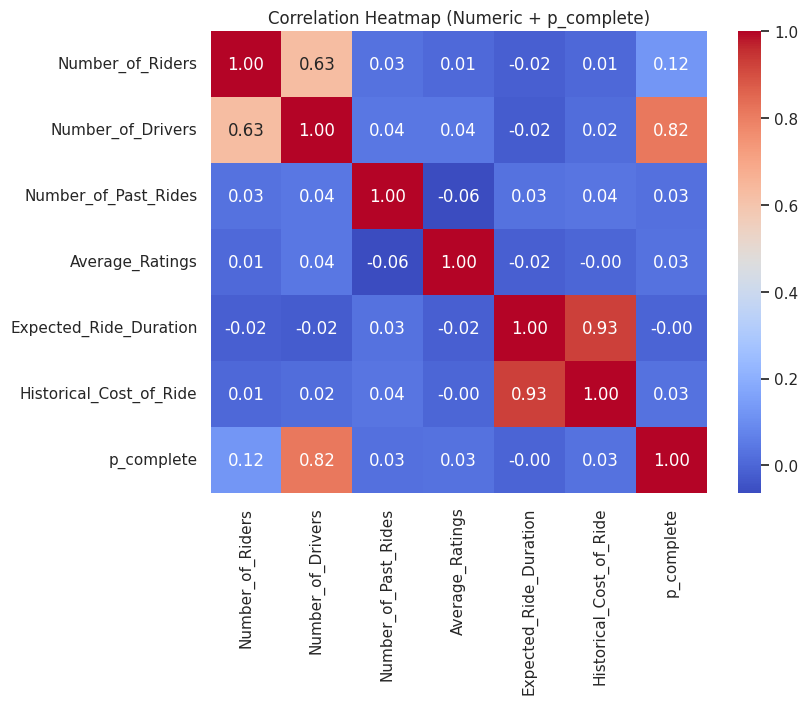

In [ ]:
# 6) Correlation Heatmap
# (only numeric engineered features)
# -------------------------------
corr = df[num_cols + ["p_complete"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap (Numeric + p_complete)")
plt.show()


✅ Feature Engineering Completed

--- Seasonality (by Time of Booking) ---
                 mean_conv  mean_price  total_intents
Time_of_Booking                                      
Afternoon         0.453331  418.900051          14708
Evening           0.438182  400.679352          13980
Morning           0.433191  415.868304          14675
Night             0.429000  403.710290          17009


/tmp/ipython-input-3087940007.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["competitor_price"] = df.groupby(["Location_Category", "Vehicle_Type"])["Historical_Cost_of_Ride"].transform("mean")
/tmp/ipython-input-3087940007.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Time_of_Booking")


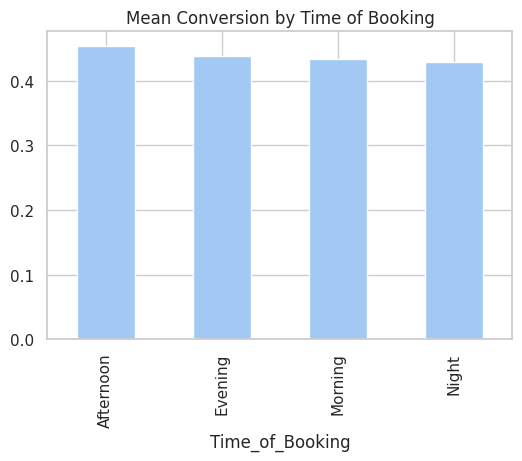

/tmp/ipython-input-3087940007.py:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Vehicle_Type")
/tmp/ipython-input-3087940007.py:104: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inv_summary = df.groupby("Inventory_Band").agg(



--- Competitor Pressure (by Vehicle Type) ---
              avg_gap_pct  mean_comp_price  mean_our_price
Vehicle_Type                                              
Economy              10.0       346.573399      381.230739
Premium              10.0       396.246242      435.870866

--- Inventory Health Summary ---
                mean_conv  mean_price  count
Inventory_Band                              
Very Tight       0.301394  409.548241    628
Tight            0.644676  415.081217    327
Balanced         0.846160  373.889614     45
Loose                 NaN         NaN      0


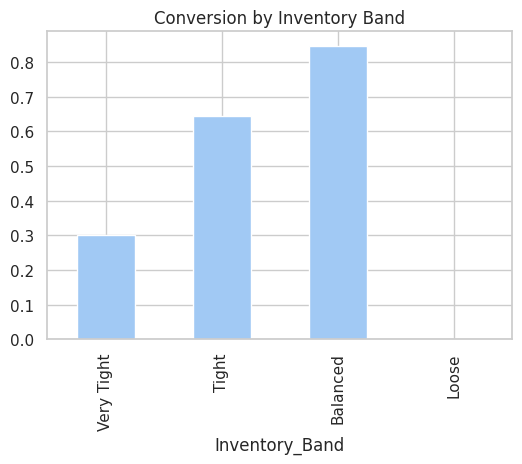


--- Customer Segmentation Profile ---
            mean_conv  mean_price   mean_cost  mean_loyalty  mean_ratio  count
segment_k4                                                                    
0            0.654031  433.905934  394.459940      0.928962    1.575995    366
3            0.469545  201.392440  183.084037      0.809524    2.515016    105
1            0.328061  457.281540  415.710491      1.061881    3.310210    404
2            0.135581  360.442923  327.675385      1.112000    8.457939    125


In [ ]:
# =====================================================
# 📌 PriceOptima Baseline Engine – Full Pipeline (Fixed)
# =====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# =====================================================
# 1) FEATURE ENGINEERING
# =====================================================

# Competitor price (simulate benchmark: mean per location + vehicle type)
df["competitor_price"] = df.groupby(["Location_Category", "Vehicle_Type"])["Historical_Cost_of_Ride"].transform("mean")

# Competitor Price Index
df["Competitor_Price_Index"] = (df["Historical_Cost_of_Ride"] / df["competitor_price"]) * 100

# Cost per minute
df["Cost_per_Min"] = df["Historical_Cost_of_Ride"] / (df["Expected_Ride_Duration"] + 1e-5)

# Driver-to-Rider Ratio
df["Driver_to_Rider_Ratio"] = df["Number_of_Drivers"] / (df["Number_of_Riders"] + 1e-5)

# Rider-to-Driver Ratio
df["Rider_Driver_Ratio"] = df["Number_of_Riders"] / (df["Number_of_Drivers"] + 1e-5)

# Inventory Health Index (supply vs demand in %)
df["Inventory_Health_Index"] = (df["Number_of_Drivers"] / (df["Number_of_Riders"] + 1e-5)) * 100

# Loyalty Score mapping
loyalty_map = {"Regular": 0, "Silver": 1, "Gold": 2, "Platinum": 3}
df["Loyalty_Score"] = df["Customer_Loyalty_Status"].map(loyalty_map)

# Peak flag (1 if Evening or Night, else 0)
df["Peak"] = df["Time_of_Booking"].apply(lambda x: 1 if x in ["Evening", "Night"] else 0)

# Supply Tightness (demand pressure)
df["Supply_Tightness"] = df["Number_of_Riders"] - df["Number_of_Drivers"]

# Vehicle Factor mapping
vehicle_map = {"Economy": 1, "Premium": 2}
df["Vehicle_Factor"] = df["Vehicle_Type"].map(vehicle_map)

# Baseline & Dynamic Price
df["baseline_price"] = df["Historical_Cost_of_Ride"]
df["price"] = df["baseline_price"] * 1.10

# Probability of Completion (proxy)
df["p_complete"] = (df["Number_of_Drivers"] / (df["Number_of_Riders"] + 1e-5)).clip(0, 1)

print("✅ Feature Engineering Completed")

# =====================================================
# 2) SEASONALITY: Conversion & Price by Time Buckets
# =====================================================
seasonality = (
    df.groupby("Time_of_Booking")
        .agg(mean_conv=("p_complete", "mean"),
             mean_price=("price", "mean"),
             total_intents=("Number_of_Riders", "sum"))
        .sort_values("mean_conv", ascending=False)
)

print("\n--- Seasonality (by Time of Booking) ---")
print(seasonality)

seasonality["mean_conv"].plot(kind="bar", figsize=(6,4), title="Mean Conversion by Time of Booking")
plt.show()

# =====================================================
# 3) COMPETITOR PRESSURE: Price Gap & Index
# =====================================================
df["Competitor_Gap_pct"] = (df["price"] - df["competitor_price"]) / df["competitor_price"] * 100.0

comp_pressure = (
    df.groupby("Vehicle_Type")
        .agg(
            avg_gap_pct=("Competitor_Gap_pct","mean"),
            mean_comp_price=("competitor_price","mean"),
            mean_our_price=("price","mean"),
        )
        .sort_values("avg_gap_pct")
)

print("\n--- Competitor Pressure (by Vehicle Type) ---")
print(comp_pressure)

# =====================================================
# 4) INVENTORY HEALTH BANDS & CONVERSION
# =====================================================
bins = [0, 0.5, 0.8, 1.2, 10]
labels = ["Very Tight","Tight","Balanced","Loose"]

df["Inventory_Band"] = pd.cut(
    df["Driver_to_Rider_Ratio"],
    bins=bins, labels=labels,
    include_lowest=True
)

inv_summary = df.groupby("Inventory_Band").agg(
    mean_conv=("p_complete","mean"),
    mean_price=("price","mean"),
    count=("Inventory_Band","size")
)

print("\n--- Inventory Health Summary ---")
print(inv_summary)

inv_summary["mean_conv"].plot(kind="bar", figsize=(6,4), title="Conversion by Inventory Band")
plt.show()

# =====================================================
# 5) CUSTOMER SEGMENTATION (KMeans)
# =====================================================
# Step 1: Select features
seg_features = [
    "Loyalty_Score","Rider_Driver_Ratio","Driver_to_Rider_Ratio",
    "Supply_Tightness","Cost_per_Min","Inventory_Health_Index",
    "Expected_Ride_Duration"
]

# Convert features to numeric explicitly
X = df[seg_features].apply(pd.to_numeric, errors="coerce")

# Fill missing values with median
X = X.fillna(X.median())

# Step 2: Scale features
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["segment_k4"] = kmeans.fit_predict(Xs)

# Ensure numeric for aggregation
numeric_cols = [
    "p_complete", "price", "Historical_Cost_of_Ride",
    "Loyalty_Score", "Rider_Driver_Ratio"
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Step 4: Segment profiling
seg_profile = (
    df.groupby("segment_k4")
        .agg(
            mean_conv=("p_complete","mean"),
            mean_price=("price","mean"),
            mean_cost=("Historical_Cost_of_Ride","mean"),
            mean_loyalty=("Loyalty_Score","mean"),
            mean_ratio=("Rider_Driver_Ratio","mean"),
            count=("segment_k4","size")
        )
        .sort_values("mean_conv", ascending=False)
)

print("\n--- Customer Segmentation Profile ---")
print(seg_profile)

# =====================================================
# ✅ FINAL OUTPUTS
# seasonality   → Conversion & price trends by time bucket
# comp_pressure → Competitive pricing gaps by vehicle type
# inv_summary   → Conversion by inventory health bands
# seg_profile   → Customer clusters with behavioral patterns
# =====================================================


Data Loaded: (1000, 10)

Missing values per column:
 Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

Unique counts:
 Number_of_Riders             81
Number_of_Drivers            79
Location_Category             3
Customer_Loyalty_Status       3
Number_of_Past_Rides        101
Average_Ratings             151
Time_of_Booking               4
Vehicle_Type                  2
Expected_Ride_Duration      171
Historical_Cost_of_Ride    1000
dtype: int64
   Historical_Cost_of_Ride  baseline_price
0               284.257273      316.063316
1               173.874753      295.341794
2               329.795469      330.370956
3               470.201232      495.556434
4               579.681422      409.570979
5               339.955361      339.

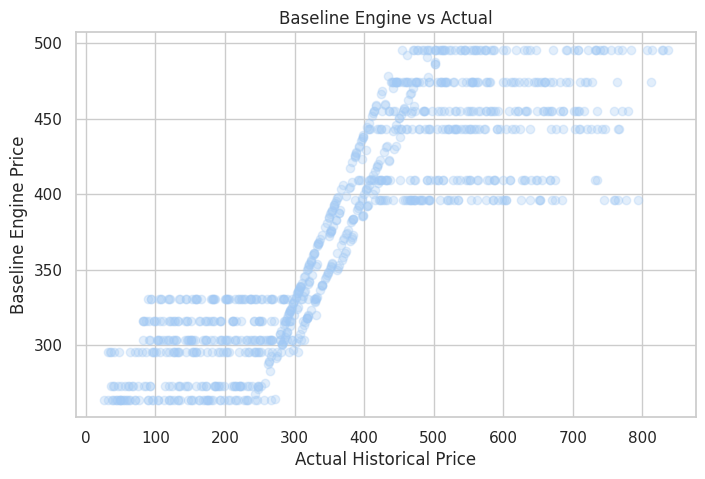

Saved baseline_engine_output.csv


In [ ]:
# =========================
# Baseline Pricing Engine
# =========================

# STEP 1: Install & Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# STEP 2: Load dataset
# If running in Colab: uncomment the below to upload your CSV manually
# from google.colab import files
# uploaded = files.upload()

# Example: if your file is called "dynamic_pricing (1).csv"
df = pd.read_csv("dynamic_pricing.csv")
print("Data Loaded:", df.shape)
df.head()

# STEP 3: Quick check
print("\nMissing values per column:\n", df.isna().sum())
print("\nUnique counts:\n", df.nunique())

# STEP 4: Basic cleaning
df = df.drop_duplicates().copy()

# Fill missing values (if any)
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(exclude=[np.number]).columns:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].mode()[0])

# STEP 5: Feature Engineering (for baseline rules)
# Surge ratio = demand / supply
df["surge_ratio"] = df["Number_of_Riders"] / (df["Number_of_Drivers"] + 1e-6)

# Competitor proxy: mean price by location + vehicle
df["competitor_price"] = df.groupby(
    ["Location_Category", "Vehicle_Type"]
)["Historical_Cost_of_Ride"].transform("mean")

# STEP 6: Baseline Pricing Rules
def baseline_price(row):
    base = row["Historical_Cost_of_Ride"]

    # Rule 1: Surge adjustment
    if row["surge_ratio"] > 2.0:
        base *= 1.10   # +10% if demand >> supply
    elif row["surge_ratio"] < 0.75:
        base *= 0.95   # -5% if oversupply

    # Rule 2: Loyalty discounts
    if row["Customer_Loyalty_Status"] == "Gold":
        base *= 0.97  # 3% discount
    elif row["Customer_Loyalty_Status"] == "Platinum":
        base *= 0.95  # 5% discount

    # Rule 3: Competitor guardrails
    comp = row["competitor_price"]
    base = min(base, comp * 1.20)   # don’t go too far above competitor
    base = max(base, comp * 0.80)   # don’t go too far below competitor

    # Rule 4: Hard limits
    base = np.clip(base, 50, 2000)

    return base

df["baseline_price"] = df.apply(baseline_price, axis=1)

# STEP 7: Compare actual vs baseline
print(df[["Historical_Cost_of_Ride","baseline_price"]].head(10))

# STEP 8: Simple visualization
plt.figure(figsize=(8,5))
plt.scatter(df["Historical_Cost_of_Ride"], df["baseline_price"], alpha=0.3)
plt.xlabel("Actual Historical Price")
plt.ylabel("Baseline Engine Price")
plt.title("Baseline Engine vs Actual")
plt.show()

# STEP 9: Save output (optional)
df.to_csv("baseline_engine_output.csv", index=False)
print("Saved baseline_engine_output.csv")
